In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/restavracije.csv')
df_nove = df[df.cena_old.isna()]
df_stare = df[df.cena_old.notna() & df.cena.notna()]
df_ukinjene = df[df.cena.isna()]

In [4]:
df[df.city == 'LJUBLJANA'].sort_values('cena_diff_percent', ascending=False).iloc[:10]

,lokal,naslov,city,cena,cena_old,doplacilo,doplacilo_old,lat,lon,posid,detailslink,sort-group,cena_diff,doplacilo_diff,cena_diff_percent,doplacilo_diff_percent
41,DOMAČA PEKARNA,Dunajska cesta 113,LJUBLJANA,5.61,3.19,2.11,0.37,46.074803,14.510908,3191,/sl/restaurant/Details/3191,68,2.42,1.74,75.862069,470.270270
2,AMBIENT,Topniška 29a,LJUBLJANA,4.70,2.82,1.20,0.00,46.067856,14.510712,1772,/sl/restaurant/Details/1772,65,1.88,1.20,66.666667,inf
282,RESTAVRACIJA SARAJEVSKIH JEDI VALTER LJUBLJANA,Šmartinska cesta 3,LJUBLJANA,8.40,5.19,4.90,2.37,46.056282,14.519282,2131,/sl/restaurant/Details/2131,82,3.21,2.53,61.849711,106.751055
4,AULA COFE,Kardeljeva ploščad 5,LJUBLJANA,4.50,2.82,1.00,0.00,46.075618,14.513162,2924,/sl/restaurant/Details/2924,65,1.68,1.00,59.574468,inf
92,KAPITAL,Kardeljeva ploščad,LJUBLJANA,4.50,2.82,1.00,0.00,46.074015,14.516453,2581,/sl/restaurant/Details/2581,75,1.68,1.00,59.574468,inf
12,BIGDIL COFE,Kardeljeva ploščad 17,LJUBLJANA,4.50,2.82,1.00,0.00,46.074017,14.516449,2926,/sl/restaurant/Details/2926,66,1.68,1.00,59.574468,inf
311,ŠEHEREZADA,Trubarjeva cesta 31,LJUBLJANA,6.50,4.22,3.00,1.40,46.052526,14.509833,2092,/sl/restaurant/Details/2092,352,2.28,1.60,54.028436,114.285714
209,PIZZERIA OSMICA,Nazorjeva ulica 8,LJUBLJANA,9.00,6.12,5.50,3.30,46.052730,14.504587,2165,/sl/restaurant/Details/2165,80,2.88,2.20,47.058824,66.666667
224,PIZZERIJA IN ŠPAGETERIJA ALCAPONE,Moskovska ulica 4,LJUBLJANA,9.00,6.13,5.50,3.31,46.068108,14.542046,3116,/sl/restaurant/Details/3116,80,2.87,2.19,46.818923,66.163142
77,HIT WOK,Čopova 4,LJUBLJANA,9.00,6.19,5.50,3.37,46.051847,14.505287,2430,/sl/restaurant/Details/2430,72,2.81,2.13,45.395800,63.204748


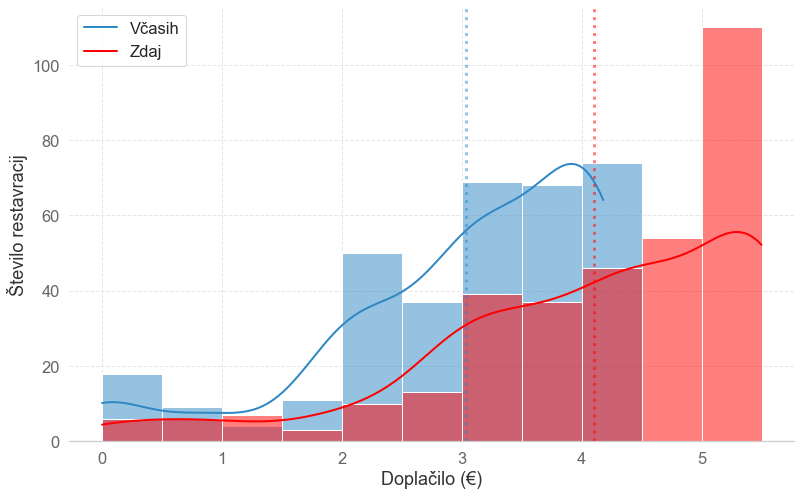

In [233]:
# use prettier modern plots
sns.set_theme('notebook', 'whitegrid', 'deep', font_scale=1.5,
	rc={'lines.linewidth': 2, 'figure.figsize': (13, 8), 'axes.spines.right': False, 'axes.spines.top': False, 'axes.spines.left': False,
	'grid.color': '.9', 'grid.linestyle': '--', 'xtick.color': '.4', 'ytick.color': '.4', 'axes.labelcolor': '.2'})

sns.histplot(df.doplacilo_old, kde=True, binwidth=0.5, legend=True, color='#2f87c4')
sns.histplot(df.doplacilo, kde=True, binwidth=0.5, legend=True, color='red')
# plt.title('Histogram doplačil v restavracijah včasih in zdaj', y=1.03)
plt.xlabel('Doplačilo (€)')
plt.ylabel('Število restavracij')
plt.legend(['Včasih', 'Zdaj'])

# vertical lines at averages
plt.axvline(df.doplacilo_old.mean(), color='#2f87c4', linestyle='dotted', linewidth=3, alpha=0.5)
plt.axvline(df.doplacilo.mean(), color='red', linestyle='dotted', linewidth=3, alpha=0.5)

# plt.savefig('plots/histogram-doplacil.png', dpi=300, bbox_inches='tight')

In [98]:
maksimalno_vcasih = (df.doplacilo_old == 4.18).sum()
maksimalno_zdaj = (df.doplacilo == 5.5).sum()
vseh_vcasih = df.doplacilo_old.count()
vseh_zdaj = df.doplacilo.count()
print(f'Maksimalno doplačilo včasih: {maksimalno_vcasih} ({maksimalno_vcasih / vseh_vcasih * 100:.2f}% od {vseh_vcasih})')
print(f'Maksimalno doplačilo zdaj: {maksimalno_zdaj} ({maksimalno_zdaj / vseh_zdaj * 100:.2f}% od {vseh_zdaj})')

Maksimalno doplačilo včasih: 42 (12.35% od 340)
Maksimalno doplačilo zdaj: 78 (23.56% od 331)


In [100]:
zastonj_vcasih = (df.doplacilo_old == 0).sum()
zastonj_zdaj = (df.doplacilo == 0).sum()
print(f'Zastonj včasih: {zastonj_vcasih} ({zastonj_vcasih / vseh_vcasih * 100:.2f}% od {vseh_vcasih})')
print(f'Zastonj zdaj: {zastonj_zdaj} ({zastonj_zdaj / vseh_zdaj * 100:.2f}% od {vseh_zdaj})')

Zastonj včasih: 15 (4.41% od 340)
Zastonj zdaj: 6 (1.81% od 331)


In [249]:
pod3_vcasih = (df.doplacilo_old < 3).sum()
pod3_zdaj = (df.doplacilo < 3).sum()
print(f'Pod 3€ včasih: {pod3_vcasih} ({pod3_vcasih / vseh_vcasih * 100:.2f}% od {vseh_vcasih})')
print(f'Pod 3€ zdaj: {pod3_zdaj} ({pod3_zdaj / vseh_zdaj * 100:.2f}% od {vseh_zdaj})')

Pod 3€ včasih: 129 (37.94% od 340)
Pod 3€ zdaj: 45 (13.60% od 331)


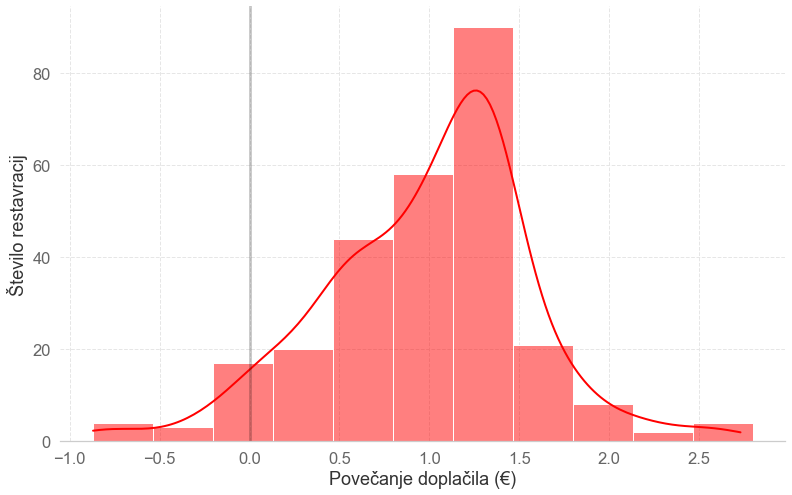

In [234]:
# plot histogram of price differences
sns.histplot(df.doplacilo_diff, kde=True, binwidth=1/3, legend=True, color='red')
# plt.title('Histogram povečanja doplačil', y=1.03)
plt.xlabel('Povečanje doplačila (€)')
plt.ylabel('Število restavracij')
# vertical line at 0
plt.axvline(0, color='black', linestyle='-', linewidth=3, alpha=0.2)

# plt.savefig('plots/histogram-povecanja-doplacil.png', dpi=300, bbox_inches='tight')